In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def calc_pathloss_params(fc, hb, hm, area_type="small_and_medium_size_cities"):
    """
    使用Okumura-Hata模型 https://www.wiley.com/legacy/wileychi/molisch/supp2/appendices/c07_Appendices.pdf
    默认参数计算出的数据 : A:110.2, B:33.8, C:0
    """
    if area_type == "small_and_medium_size_cities":
        C = 0
        ahm = (1.1*np.log10(fc)-0.7)*hm - (1.56*np.log10(fc)-0.8)
    else:
        if fc <= 200:
            ahm = 8.29*(np.log10(1.54*hm))**2 - 1.1
        else:
            ahm = 3.2*(np.log10(11.75*hm))**2 - 4.97
        if area_type == "metropolitan_areas":
            C = 0
        if area_type == "suburban_environments":
            C = -2*(np.log10(fc/28))**2 - 5.4
        if area_type == "rural_area":
            C = -4.78*(np.log10(fc))**2 + 18.33*np.log10(fc) - 40.98
    A = 69.55 + 26.16 * np.log10(fc) - 13.82 * np.log10(hb) - ahm
    B = 44.9 - 6.55 * np.log10(hb)
    return A, B, C

207.48470021774932 36.37825352840092 0


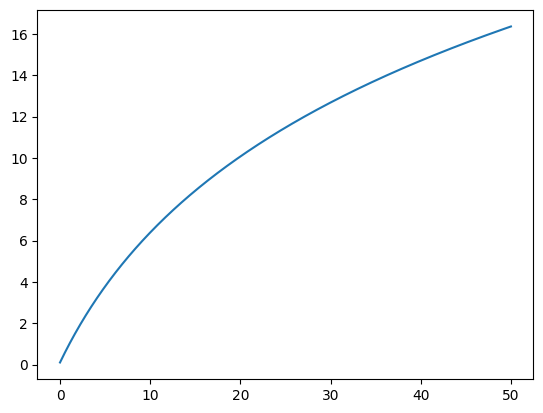

In [60]:
# A = 110.2
# B = 33.8
# C = 0

A, B, C = calc_pathloss_params(900*1e6, 20, 10,area_type="small_and_medium_size_cities")

def calc_pathloss(d):
    return 62.8 + 20.9 * np.log10(d/10000+1e-3)
    # return A + B * np.log10(d/1000+1e-3) + C

x = np.linspace(0, 50, 1000)
y = calc_pathloss(x)
plt.plot(x, y);
print(A, B, C)

In [59]:
y

array([ 0.1       ,  0.96593307,  1.75640222,  2.48351255,  3.15667153,
        3.78333542,  4.36951419,  4.92012291,  5.43923261,  5.93025306,
        6.39606869,  6.83914126,  7.26158859,  7.6652458 ,  8.05171348,
        8.42239605,  8.77853254,  9.12122158,  9.45144187,  9.770069  ,
       10.07788943, 10.37561224, 10.66387891, 10.94327169, 11.21432064,
       11.47750969, 11.73328189, 11.98204382, 12.22416953, 12.46000391,
       12.68986564, 12.91404979, 13.13283008, 13.3464609 , 13.5551791 ,
       13.75920555, 13.95874656, 14.1539951 , 14.34513197, 14.53232678,
       14.71573885, 14.89551805, 15.07180548, 15.24473421, 15.41442984,
       15.58101104, 15.74459007, 15.90527323, 16.06316127, 16.21834978,
       16.37092951, 16.52098673, 16.6686035 , 16.81385791, 16.9568244 ,
       17.09757392, 17.23617418, 17.37268983, 17.50718266, 17.63971173,
       17.77033356, 17.89910228, 18.02606972, 18.1512856 , 18.27479757,
       18.39665139, 18.51689099, 18.63555858, 18.75269473, 18.86